In [10]:
from money_model import *
from mesa.batchrunner import batch_run

params = {"width": 10, "height": 10, "N": range(10, 500, 10), "seed": range(0,5)}

results = batch_run(
    MoneyModel,
    parameters=params,
    iterations=1,
    max_steps=100,
    number_processes=None,
    data_collection_period=1,
    display_progress=True,
)

print('done')

245it [00:09, 26.98it/s]


done


In [13]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'seed', 'Gini',
       'AgentID', 'Wealth'],
      dtype='object')


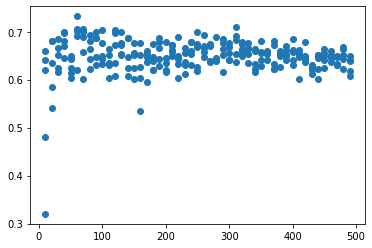

In [14]:
results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 100)]
N_values = results_filtered.N.values
gini_values = results_filtered.Gini.values
plt.scatter(N_values, gini_values)

In [15]:
results_filtered.to_csv('batch_run.csv')

In [19]:
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 0)]
# Then, print the columns of interest of the filtered data frame
# print(one_episode_wealth.to_string(index=True, columns=["Step", "AgentID", "Wealth"]))
# For a prettier display we can also convert the data frame to html, uncomment to test in a Jupyter Notebook
from IPython.display import display, HTML
display(HTML(one_episode_wealth.to_html(index=False, columns=['Step', 'AgentID', 'Wealth'], max_rows=25)))

Step,AgentID,Wealth
0,0,1
0,1,1
0,2,1
0,3,1
0,4,1
0,5,1
0,6,1
0,7,1
0,8,1
0,9,1
